# Introduction to Machine Learning: Classification & Clustering

In [1]:
from sklearn import datasets
from sklearn import model_selection  
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# set random seed so that we get the same random numbers
np.random.seed(123)

In [4]:
# check version of scikit-learn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


## Classification
Recall that we already saw an example of classification where we used a logistic regression to classify Iris flower samples from sepal and petal widths and lengths.  Let's consider this data again but now we will conder all 3 species.  


In [5]:
#load built-in data in the Scikit-Learn library 
iris = datasets.load_iris()

In [6]:
type(iris)

sklearn.utils.Bunch

Bunch is a dictionary-like object. Some useful attributes are:
- `data`: the data to learn
- `target`: the classification labels
- `target_names`: the meaning of the labels
- `feature_names`: the meaning of features

In [7]:
#iris.data

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
# Split the dataset into a training part(70%) and a testing part (30%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size = 0.7)


In [13]:
# First step: create a classifer instance 
classifier = linear_model.LogisticRegression(solver="lbfgs",multi_class="auto")

In [14]:
# Call the 'fit' method to train the classifer
classifier.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Predict the class for the samples in the testing datasets
#    (so that we can compare the predictions with the actual values)
y_test_pred = classifier.predict(X_test)

In [16]:
y_test_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [17]:
y_test

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

The `sklearn.metrics.classification_report` function returns a text report showing the main classification metrics (see detail [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) )

Also:
* [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [F1 score](https://en.wikipedia.org/wiki/F1_score)

In [18]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



We can also look at the *confusion matrix* $C$ where $C_{ij}$ is the number of samples of category $i$ that were categorized as *j*.  That is, the diagonal elements corresponds to the number of correctly classified samples for each category, and the off-diagonal elements are the number of incorrectly classified samples.

In [19]:
metrics.confusion_matrix(y_test, y_test_pred)
## NOTE1:  the numbers depend on the random seed
## NOTE2:  the sum of each row is the total number of samples for the corresponding category. 


array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  3, 14]], dtype=int64)

In [20]:
#count unique value in y_test
np.bincount(y_test)

array([18, 10, 17], dtype=int64)

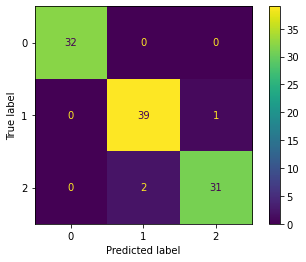

In [21]:
# We can also plot the confusion matrix
# Note: more recent sklearn provides a function for this 
metrics.plot_confusion_matrix(classifier, X_train, y_train)

# In case your version does not have it
#sn.set(font_scale=1.4) # for label size
#sn.heatmap(metrics.confusion_matrix(y_test, y_test_pred), 
#           annot=True, annot_kws={"size": 16}) # font size


So far we have just used a logistic regression model as a classifier. Other popular classifiers are 
- decision trees  ([detail](https://en.wikipedia.org/wiki/Decision_tree_learning))
- nearest neighbor methods ([detail](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) and [overview](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn))
- support-vector machine (SVM) ([detail](https://en.wikipedia.org/wiki/Support_vector_machine ))
- Random Forest method ([detail](https://en.wikipedia.org/wiki/Random_forest) )

See a [flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/) of a rough guide on how to choose an estimator and detailed [comparison](https://www.dataschool.io/comparing-supervised-learning-algorithms/).

In [22]:
# Use a decision tree as classifier
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  3, 14]], dtype=int64)

In [ ]:
# Look at the decision tree
tree.plot_tree(classifier)

In [ ]:
# Use the nearest neighbor classifier
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

In [ ]:
# Use SVM classifer --- next class is devoted to SVM
classifier = svm.SVC(gamma="auto")
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

In [ ]:
# Use Random Forest classifer
classifier = ensemble.RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

In [ ]:
# look at the feature importances --- we again see the petal width/height are most informative
classifier.feature_importances_

Next, we will vary the training and testing sample sizes and compare four classifiers.

In [ ]:
# create a numpy array with training size ratios, ranging from 10% to 90%
train_size_vec = np.linspace(0.1, 0.9, 30)

# create a list of classifiers
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

# create an array that stores the diagonals of the confusion matrix as a function of training size ratio
# and classifier
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

# loop over each training size ratio and classifier
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)
        
# plot accuracy as a function of training size ratio
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__,fontsize="x-small")
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy",fontsize="x-small")
    axes[m].set_xlabel("training size ratio",fontsize="x-small")
    axes[m].legend(loc=4,fontsize="x-small")
    axes[m].tick_params(axis="x", labelsize=12)
    axes[m].tick_params(axis="y", labelsize=12)

fig.tight_layout()

- We can see that the error is different for each model.
- Which classifier is best depends on the problem.
- The good news is that it's easy to switch them in Scikit-learn.
- Besides accuracy, computational performance can be important.  For large problems with many features, a decision tree method such as Random Forest is a good one to try first. 

## Clustering
- Clustering can be considered as a classification problem where the classes are NOT known. For more details, see [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)).
- It is an example of unsupervised learning (data is unlabeled). 
- The input of a clustering algorithm contains only the feature variables and the output of the algorithm is an array of integers that represent a cluster(or class) of each sample.
- Popular clustering methods are:
    - [*K-means algorithm*](https://en.wikipedia.org/wiki/K-means_clustering): groups the samples into clusters such that the within-group sum of square deviation is minimized.  ( `sklearn.cluster.Kmeans`)
    - [*mean-shift algorithm*](https://en.wikipedia.org/wiki/Mean_shift) : clusters the samples by fitting the data to density functions (e.g. Gaussian functions)  ( `sklearn.cluster.MeanShift`)

 A full list of methods in Scikit-Learn [here](http://scikit-learn.org/stable/modules/clustering.html)

**Example:** Consider again the Iris dataset but this time we will not use the response variable. We will implement the K-means method. We need to specify the number of clusters (we will use `n_clusters = 3` since we know this in advance). 

In [ ]:
# store feature data in X and response data in y
X, y = iris.data, iris.target

In [ ]:
# set random seed so that we get the same random numbers
np.random.seed(555)

In [ ]:
# Step1: create an instance of KMeans class using number of clusters = 3
clustering = cluster.KMeans(n_clusters = 3)

In [ ]:
# Step2: call the fit() method
clustering.fit(X)

In [ ]:
# Step3: use predict() method to make prediction
y_pred = clustering.predict(X)

In [ ]:
# Since the output is long, we'll look at every 8th element
y_pred[::8]

In [ ]:
y[::8]
## NOTE: there is a good correlation btw the two, but the output has assigned different numbers to the groups
##   than what was used in the target vector
## - To be able to compare two arrays with metrics such as the confusion matrix, we need to rename the elements
##      so that the same integers are used 

In [ ]:
# Rename the elements in y_pred so that the same integers are used as in y
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 0, 2, 1
y_pred[::8]

In [ ]:
# Look at the confusion matrix
metrics.confusion_matrix(y, y_pred)

## NOTE(numbers might be different): the algorithm was able to correctly identify all samples in group 0 (first species) as a group of its own.
#  2 elements from group 1 was assigned to group 2
# 14 elements from group 2 was assinged to group 1

In [ ]:
# Make scatter plots for each pair of features

N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"] # different color for each cluster
markers = ["^", "v", "o"]           # different symbol for each cluster
n_clusters = 3
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25) # alpha is transparency

        for idx in np.where(y != y_pred):  # Put a red rectangle at bad predictions
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
        axes[m,n].set_xlim([0,8])
        axes[m,n].set_ylim([0,8])
        axes[m,n].set_xticks([0,2,4,6,8])
        axes[m,n].set_yticks([0,2,4,6,8])

    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()
fig.savefig("clustering_iris.pdf")
## NOTE: the clustering does a very good job at recognizing which sample belongs to distinct group,
## but because of the overlap in the features we cannot expect any unsupervised clustering algorithm can
## fully resolve the various groups in the dataset 

## References: 
- *Numerical Python: A Practical Techniques Approach for Industry*  by Robert Johansson (Chapter 15)
- *Python Data Science Handbook* by Jake VanderPlas
- https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/